#### Initial Set Ups!!



In [ ]:
!pip install transformers
!pip install datasets

import os
import sys
import torch
from google.colab import drive
import numpy as np


# initialise some parameters
PATH_TO_MODEL_DIR = "/content/gdrive/MyDrive/0db/"
CHECKPOINT = "/content/gdrive/MyDrive/0db/distilbert_trained_model.pt"
NUM_SAMPLES = 64

#Utilise GPU for training/testing, if available
if torch.cuda.is_available():
  device = torch.device("cuda")
  print("GPU Available: ", torch.cuda.get_device_name(0))
else:
  device = torch.device("cpu")
  print("No GPU Available, Switching To CPU.")

# mount google drive 
drive.mount('/content/gdrive')
sys.path.append(PATH_TO_MODEL_DIR)
# change current working directory to /0db, where are Tokenizer module is 
%cd "/content/gdrive/MyDrive/0db/"

#### Call cb_run_bert_one_iteration.py and run a number of iterations of Monte Carlo approximation to estimate Shapley values for selected neurons

In [ ]:
%%shell
for i in $(seq 0 50)
do
  python cb_run_bert_one_iteration.py
done

#### Plot the results

##### Plot single experiment results

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd

# Plot single experiment results 
# provide experiment name and save in experiment_number
experiment_number = 21
results_dir = "/content/gdrive/MyDrive/0db/NShap/results/distilBERT/cb_Bernstein_0.2_64"

vals_txt = 'vals_' + str(experiment_number) + '.txt'
vals_path = os.path.join(results_dir, vals_txt)

# Read saved values for each player (contributions)

vals = pd.read_csv(vals_path, header = None).T
vals.columns = ['vals']
vals = vals['vals'].to_list()

# Seperate positive and negative contributions for better visualisation

# find indexes of positive and negative values
index_positive = [i for i, val in enumerate(vals) if val > 0.0]
index_negative = [i for i, val in enumerate(vals) if val < 0.0]

# save positive and negative values in seperate lists
val_pos = [float(val) for val in vals if float(val)>0.0]
val_neg = [float(val) for val in vals if float(val)<0.0]



In [ ]:
# Print non zero calculated contributions
print(val_pos)
print(val_neg)
print(len(val_pos))
print(len(val_neg))

Text(0.5, 1.0, 'Selected neurons in pre_classifier')

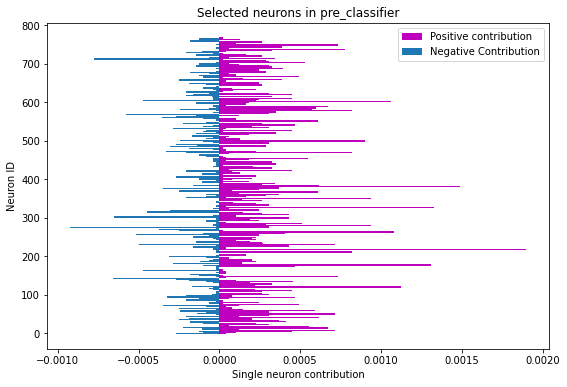

In [ ]:
# generate plot for one individual execution
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax.barh(index_positive, val_pos, height = 3.5, color = "m")
ax.barh(index_negative, val_neg, height = 3.5)
ax.legend(["Positive contribution", "Negative Contribution"])
ax.set_xlabel("Single neuron contribution")
ax.set_ylabel("Neuron ID")
ax.set_title("Selected neurons in pre_classifier")

##### Compute marginal contributions using the results from a selected number of experiments

In [ ]:
results = [saved for saved in os.listdir(results_dir)
           if 'vals' in saved]
#print(len(results))

sums = np.zeros(len(vals))

# start from file #2
for i in range(2, len(results)):
  #print(i)
  
  vals_txt = 'vals_' + str(i) + '.txt'
  vals_path = os.path.join(results_dir, vals_txt)
  
  # Read saved values for each player (contributions)

  vals = pd.read_csv(vals_path, header = None).T
  vals.columns = ['vals']
  vals = vals['vals'].to_numpy()

  sums +=vals 

# compute marginal contributions (in this case moving average)
sums = sums/ (len(vals)-2)
#print(sums)

# Seperate positive and negative marginal contributions for better visualisation

# find indexes of positive and negative values
index_positive = [i for i, val in enumerate(sums) if val > 0.0]
index_negative = [i for i, val in enumerate(sums) if val < 0.0]

# save positive and negative values in seperate lists
val_pos = [float(val) for val in sums if float(val)>0.0]
val_neg = [float(val) for val in sums if float(val)<0.0]


In [ ]:
# Print non negative calculated contributions
print(val_pos)
print(val_neg)
print(len(val_pos))
print(len(val_neg))

##### Plot marginal contributions 

Text(0.5, 1.0, 'Selected neurons in pre_classifier')

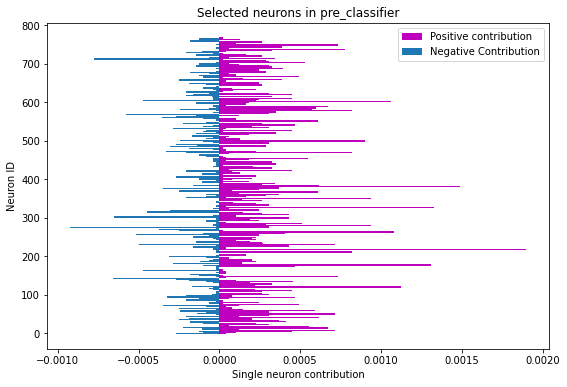

In [ ]:
# generate plot for multiple executions
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax.barh(index_positive, val_pos, height = 3.5, color = "m")
ax.barh(index_negative, val_neg, height = 3.5)
ax.legend(["Positive contribution", "Negative Contribution"])
ax.set_xlabel("Single neuron contribution")
ax.set_ylabel("Neuron ID")
ax.set_title("Selected neurons in pre_classifier")